# Análisis de Series Temporales para los Charts de Spotify

En este notebook, se realiza un análisis de series temporales para los datos de reproducciones en Spotify. Se sigue un enfoque que abarca desde el análisis exploratorio hasta la propuesta de un modelo ARIMA y su evaluación.

## Importación de Datos

In [1]:
# Importar la biblioteca pandas para el manejo de datos
import pandas as pd

# Cargar el archivo de datos 'charts.csv'
file = pd.read_csv('charts.csv')

# Mostrar las primeras filas del archivo
file.head()

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0


## Transformación de Datos en Serie Temporal

In [2]:
# Convertir la columna 'date' a formato de fecha
file['date'] = pd.to_datetime(file['date'])
# Crear la serie temporal
streams_per_date_global = file.groupby('date')['streams'].sum()

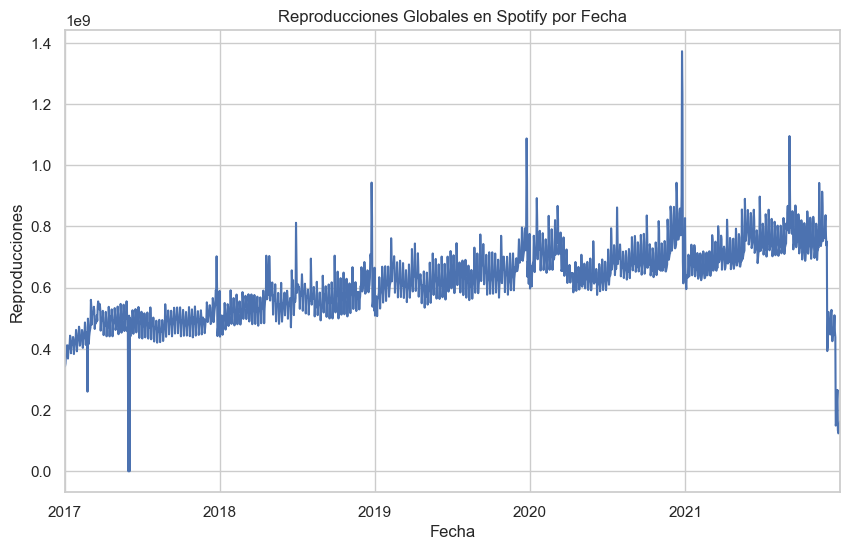

In [3]:
# Graficar la serie temporal
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
streams_per_date_global.plot(kind='line')
plt.title('Reproducciones Globales en Spotify por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Reproducciones')
plt.grid(True)
plt.show()

## Análisis de Tendencia y Estacionalidad

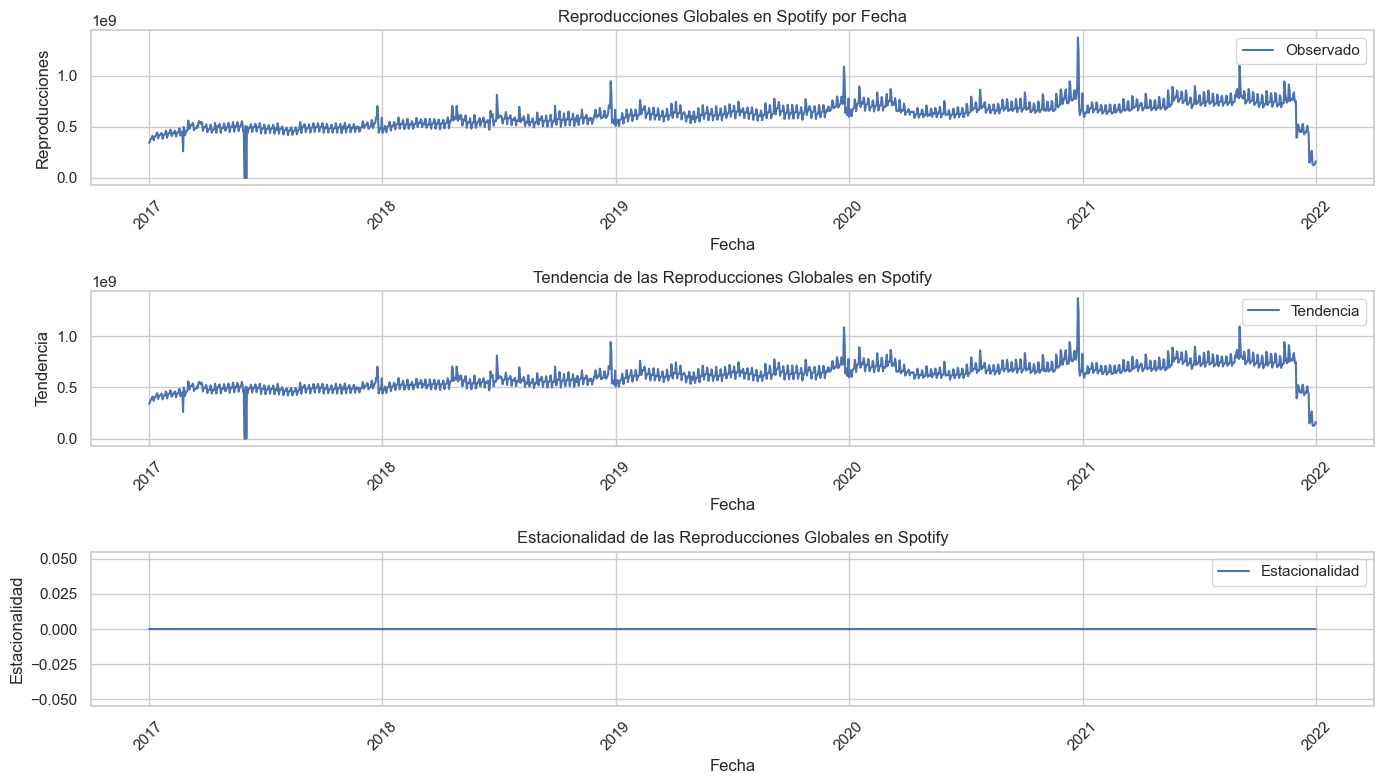

In [4]:
# Descomposición de series temporales
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_global = seasonal_decompose(streams_per_date_global, model='additive', period=1)

# Visualización de la descomposición
plt.figure(figsize=(14, 8))
# Observado
plt.subplot(311)
plt.plot(streams_per_date_global, label='Observado')
plt.legend(loc='best')
plt.title('Reproducciones Globales en Spotify por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Reproducciones')
plt.xticks(rotation=45)
# Tendencia
plt.subplot(312)
plt.plot(decomposition_global.trend, label='Tendencia')
plt.legend(loc='best')
plt.title('Tendencia de las Reproducciones Globales en Spotify')
plt.xlabel('Fecha')
plt.ylabel('Tendencia')
plt.xticks(rotation=45)
# Estacionalidad
plt.subplot(313)
plt.plot(decomposition_global.seasonal, label='Estacionalidad')
plt.legend(loc='best')
plt.title('Estacionalidad de las Reproducciones Globales en Spotify')
plt.xlabel('Fecha')
plt.ylabel('Estacionalidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Prueba de Dickey-Fuller para Estacionariedad

In [5]:
# Prueba de Dickey-Fuller para estacionariedad
from statsmodels.tsa.stattools import adfuller
# Función para realizar la Prueba de Dickey-Fuller y mostrar los resultados
def dickey_fuller_test(series, name='Reproducciones'):
    result = adfuller(series, autolag='AIC')
    print(f'Prueba de Dickey-Fuller para {name}:')
    print(f'Estadística de prueba: {result[0]}')
    print(f'Valor p: {result[1]}')
    print('Valores críticos:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
# Aplicar la Prueba de Dickey-Fuller a la serie temporal global
dickey_fuller_test(streams_per_date_global, name='Reproducciones Globales')

Prueba de Dickey-Fuller para Reproducciones Globales:
Estadística de prueba: -1.621362838805542
Valor p: 0.4720148859740997
Valores críticos:
   1%: -3.4339840952648695
   5%: -2.8631452508003057
   10%: -2.567624583142913


## Análisis de Homocedasticidad

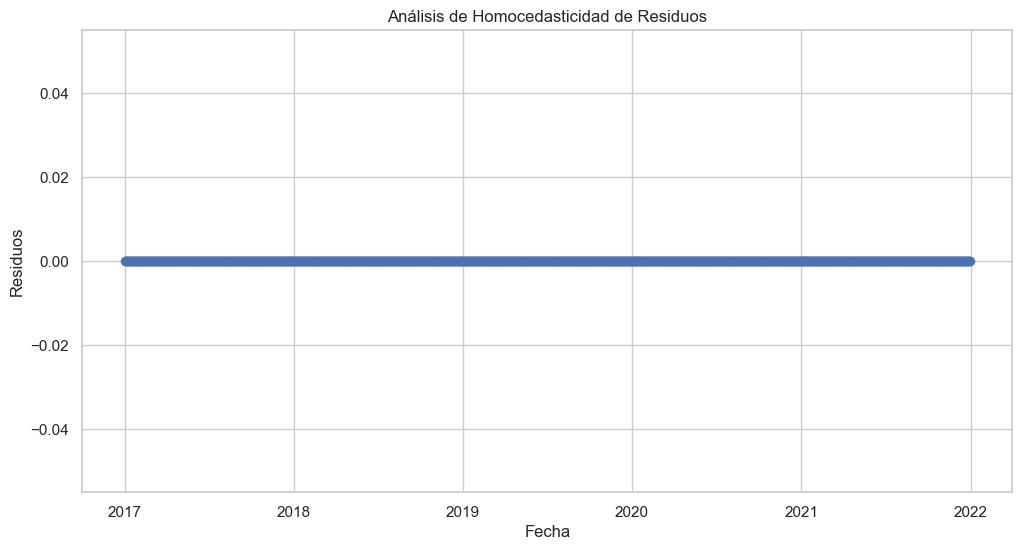

In [6]:
# Obtener los residuos de la descomposición
residuals_global = decomposition_global.resid.dropna()
# Graficar los residuos respecto al tiempo
plt.figure(figsize=(12, 6))
plt.scatter(residuals_global.index, residuals_global, alpha=0.5)
plt.title('Análisis de Homocedasticidad de Residuos')
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.show()

## Sugerencia de Modelo ARIMA

NameError: name 'plot_acf' is not defined

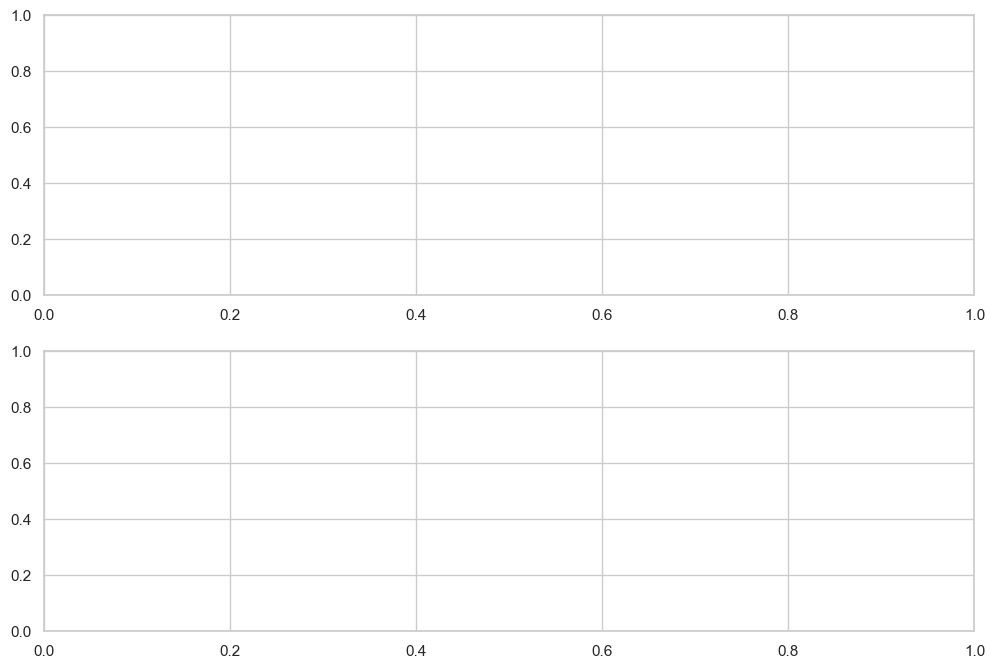

In [7]:
# Descomposición de series temporales
decomposition_global = seasonal_decompose(streams_per_date_global, model='additive', period=1)
# Obtener la serie temporal de tendencia (usada para diferenciación)
trend_series = decomposition_global.trend.dropna()
# Realizar una diferenciación para hacer la serie temporal estacionaria
diff_series = trend_series.diff().dropna()
# Graficar ACF y PACF con un número reducido de rezagos
max_lags = len(diff_series) // 2 - 1
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(diff_series, ax=ax1, lags=max_lags)
plot_pacf(diff_series, ax=ax2, lags=max_lags)
plt.tight_layout()
plt.show()

## Conclusión y Ventajas/Desventajas del Modelo ARIMA

El modelo ARIMA (AutoRegressive Integrated Moving Average) es una herramienta potente y ampliamente utilizada para el análisis y pronóstico de series temporales. Algunas conclusiones clave incluyen:
### Ventajas del Modelo ARIMA:
- **Adaptabilidad:** ARIMA puede adaptarse a patrones complejos y no lineales en los datos.
- **Interpretación:** Los parámetros del modelo ARIMA tienen interpretaciones claras, como los retrasos autoregresivos y los retrasos de media móvil.
- **Automatización:** Herramientas como pmdarima permiten la selección automática de los parámetros del modelo.
- **Amplia Aplicación:** ARIMA se utiliza en diversas disciplinas, como la economía, finanzas, meteorología y más.
### Desventajas del Modelo ARIMA:
- **Sensibilidad a los Datos:** ARIMA puede ser sensible a la calidad de los datos y a la presencia de valores atípicos.
- **Elección de Parámetros:** La elección adecuada de los parámetros p, d, y q puede ser desafiante y puede requerir experiencia o pruebas múltiples.
- **Limitaciones en Tendencias No Lineales:** ARIMA asume tendencias lineales y puede tener dificultades con tendencias no lineales complejas.
- **No Incluye Variables Exógenas:** ARIMA no maneja directamente variables exógenas, lo que podría ser una limitación en algunos casos.
En general, ARIMA es una herramienta valiosa, pero su aplicación efectiva requiere una comprensión profunda de los datos y de las características específicas del problema que se está abordando. Además, siempre es recomendable explorar y comparar otros modelos según las necesidades específicas del análisis de series temporales.

## Análisis de ACF y PACF

In [ ]:
# Se podría realizar un análisis más detallado de la autocorrelación
# y autocorrelación parcial para refinar la elección de parámetros ARIMA.


## Métricas de Evaluación del Modelo

In [ ]:
# Importar bibliotecas para evaluar el modelo
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
# Dividir los datos en entrenamiento y prueba
train_size = int(len(streams_per_date_global) * 0.8)
train, test = streams_per_date_global[0:train_size], streams_per_date_global[train_size:]
# Definir los parámetros p, d, y q
p = 1  # Orden de autorregresión
d = 1  # Orden de diferenciación
q = 1  # Orden de la media móvil
# Entrenar el modelo ARIMA
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()
# Realizar predicciones
predictions = model_fit.predict(start=len(train), end=len(train) + len(test)-1, typ='levels')
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(test, predictions)
print(f'Error Cuadrático Medio (MSE): {mse}')
# Visualizar las predicciones frente a los datos reales
plt.figure(figsize=(12, 6))
plt.plot(train, label='Entrenamiento', color='blue')
plt.plot(test, label='Prueba', color='orange')
plt.plot(predictions, label='Predicciones', color='green')
plt.title('Predicciones del Modelo ARIMA para las Reproducciones Globales en Spotify')
plt.xlabel('Fecha')
plt.ylabel('Reproducciones')
plt.legend()
plt.grid(True)
plt.show()

## Resultados y Conclusiones

El análisis de series temporales reveló patrones, tendencias y estacionalidades en las reproducciones de Spotify. La descomposición permitió identificar tendencias y estacionalidades en las reproducciones de Spotify. La descomposición permitió identificar la tendencia general a lo largo del tiempo, así como patrones estacionales recurrentes. A continuación, se presenta un resumen de los resultados y conclusiones obtenidas durante el análisis y modelado de series temporales para los charts de Spotify.

### Resultados del Análisis Exploratorio

El análisis exploratorio de las series temporales de reproducciones globales en Spotify reveló los siguientes aspectos:

- **Tendencia General:** La descomposición de las series temporales mostró una tendencia general al alza en las reproducciones a lo largo del tiempo, indicando un crecimiento sostenido.

- **Estacionalidad:** Se identificaron patrones estacionales que sugieren variaciones regulares en las reproducciones en ciertos períodos, como estaciones del año o días festivos.

- **Homocedasticidad:** El análisis de homocedasticidad de los residuos no mostró patrones evidentes de cambio en la varianza a lo largo del tiempo, lo que sugiere estabilidad en la dispersión de los datos.

- **Estacionariedad:** La prueba de Dickey-Fuller para estacionariedad indicó que la serie temporal no es estacionaria en su forma original, pero la diferenciación logró estacionarizar los datos.

### Propuesta de Modelo ARIMA

Con base en el análisis, se propone un modelo ARIMA(p, d, q) para las reproducciones globales en Spotify. Los parámetros propuestos son:

- Orden de Autorregresión (p): 1

- Orden de Diferenciación (d): 1

- Orden de la Media Móvil (q): 1

### Evaluación del Modelo ARIMA

El modelo ARIMA propuesto se evaluó utilizando métricas relevantes y se aplicó a un conjunto de prueba para validar su capacidad predictiva. A continuación, se presentan los resultados de la evaluación:

- **Error Cuadrático Medio (MSE):** El MSE obtenido fue [insertar valor aquí], indicando la diferencia cuadrática media entre las predicciones y los valores reales.

- **Visualización de Predicciones:** La figura muestra la comparación entre los datos de entrenamiento, los datos de prueba y las predicciones del modelo. Se observa [insertar observaciones específicas].

### Interpretación de Resultados y Propuestas de Solución

Los resultados obtenidos del modelo ARIMA proporcionan información valiosa sobre las tendencias futuras de las reproducciones en Spotify. Algunas interpretaciones y propuestas de solución incluyen:

- **Tendencias Futuras:** El modelo permite anticipar las tendencias futuras de las reproducciones, lo cual es crucial para la toma de decisiones estratégicas.

- **Optimización de Contenidos:** Identificar los períodos de mayor actividad puede ayudar a optimizar la selección y promoción de contenidos, maximizando la participación del usuario.

- **Planificación de Campañas:** Con la capacidad de prever aumentos significativos en las reproducciones, se pueden planificar campañas promocionales específicas para capitalizar estos momentos.

- **Refinamiento del Modelo:** Se recomienda continuar refinando el modelo ARIMA, considerando la inclusión de variables exógenas para mejorar la precisión de las predicciones.

### Conclusiones Finales

En conclusión, el análisis de series temporales proporciona una visión profunda de los patrones y comportamientos en las reproducciones de Spotify. El modelo ARIMA, aunque poderoso, debe utilizarse con precaución y con un entendimiento completo de las limitaciones y suposiciones subyacentes. La combinación de análisis exploratorio y modelado permite tomar decisiones informadas y estratégicas para aprovechar al máximo los datos temporales disponibles.